**Name:** Vishnu Mallam  
**Subject:** Advanced Big Data and Data Mining  
**Assignment:** Lab 1 - Data Visualization, Preprocessing, and Statistical Analysis


In [1]:
# =============================================================================
# STEP 1: DATA COLLECTION
# =============================================================================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset Shape: (2823, 25)

First 5 rows of the dataset:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


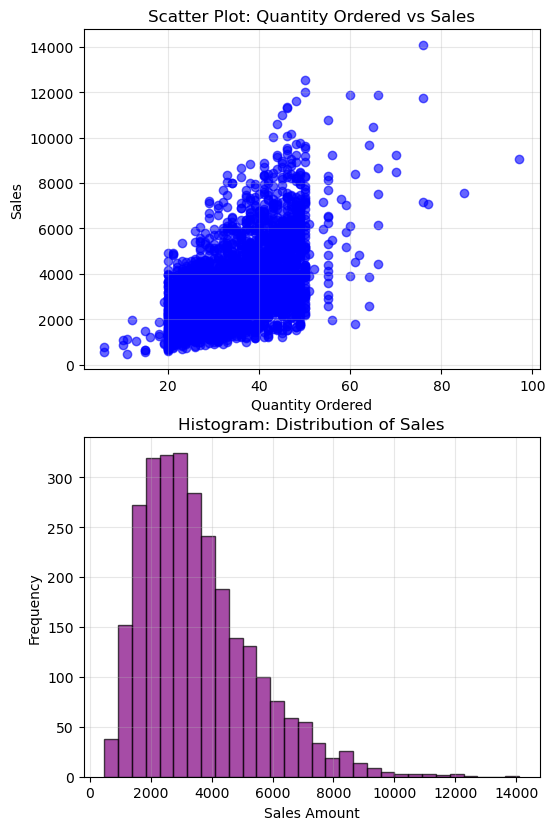

In [2]:
# =============================================================================
# STEP 2: DATA VISUALIZATION
# =============================================================================

# Set up the plotting environment
plt.figure(figsize=(20, 15))

# 1. Scatter Plot - Relationship between QUANTITYORDERED and SALES
plt.subplot(3, 3, 1)
plt.scatter(df['QUANTITYORDERED'], df['SALES'], alpha=0.6, color='blue')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.title('Scatter Plot: Quantity Ordered vs Sales')
plt.grid(True, alpha=0.3)

# 2. Histogram - Distribution of Sales
plt.subplot(3, 3, 4)
plt.hist(df['SALES'], bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Sales')
plt.grid(True, alpha=0.3)

# Scatter plots reveal relationships between two variables, while histograms show the distribution of a single variable. Together, they help identify patterns, trends, and data concentration in a dataset.

In [3]:
# =============================================================================
# STEP 3: DATA PREPROCESSING
# =============================================================================

# 1. HANDLING MISSING VALUES
print("=== HANDLING MISSING VALUES ===")
print("\nMissing values before handling:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0])

# Create a copy for preprocessing
df_processed = df.copy()

# Handle missing values
# For ADDRESSLINE2: Fill with 'Not Available'
df_processed['ADDRESSLINE2'].fillna('Not Available', inplace=True)

# For STATE: Fill with 'Unknown'
df_processed['STATE'].fillna('Unknown', inplace=True)

# For POSTALCODE: Fill with forward fill method
df_processed['POSTALCODE'].fillna(method='ffill', inplace=True)

# For TERRITORY: Fill with 'Unassigned'
df_processed['TERRITORY'].fillna('Unassigned', inplace=True)

print("\nMissing values after handling:")
missing_after = df_processed.isnull().sum()
print(missing_after[missing_after > 0])

=== HANDLING MISSING VALUES ===

Missing values before handling:
ADDRESSLINE2    2521
STATE           1486
POSTALCODE        76
TERRITORY       1074
dtype: int64

Missing values after handling:
Series([], dtype: int64)


In [4]:
# 2. OUTLIER DETECTION AND REMOVAL
print("\n=== OUTLIER DETECTION AND REMOVAL ===")

# Focus on SALES column for outlier detection
Q1 = df_processed['SALES'].quantile(0.25)
Q3 = df_processed['SALES'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Identify outliers
outliers = df_processed[(df_processed['SALES'] < lower_bound) | (df_processed['SALES'] > upper_bound)]
print(f"\nNumber of outliers identified: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df_processed)*100:.2f}%")

# Remove outliers
df_no_outliers = df_processed[(df_processed['SALES'] >= lower_bound) & (df_processed['SALES'] <= upper_bound)]
print(f"Dataset size after outlier removal: {len(df_no_outliers)} (was {len(df_processed)})")


=== OUTLIER DETECTION AND REMOVAL ===
Q1 (25th percentile): 2203.43
Q3 (75th percentile): 4508.00
IQR: 2304.57
Lower bound: -1253.42
Upper bound: 7964.85

Number of outliers identified: 81
Percentage of outliers: 2.87%
Dataset size after outlier removal: 2742 (was 2823)


In [5]:
# 3. DATA REDUCTION
print("\n=== DATA REDUCTION ===")

# Sampling - reduce to 70% of data
sample_size = int(0.7 * len(df_no_outliers))
df_sampled = df_no_outliers.sample(n=sample_size, random_state=42)
print(f"Dataset size after sampling (70%): {len(df_sampled)}")

# Dimension reduction - remove less relevant columns
columns_to_drop = ['ADDRESSLINE2', 'PHONE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
df_reduced = df_sampled.drop(columns=columns_to_drop)
print(f"Columns after dimension reduction: {df_reduced.shape[1]} (was {df_sampled.shape[1]})")
print("Dropped columns:", columns_to_drop)


=== DATA REDUCTION ===
Dataset size after sampling (70%): 1919
Columns after dimension reduction: 21 (was 25)
Dropped columns: ['ADDRESSLINE2', 'PHONE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']


In [6]:
# 4. DATA SCALING AND DISCRETIZATION
print("\n=== DATA SCALING AND DISCRETIZATION ===")

# Min-Max Scaling for numerical columns
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
scaler = MinMaxScaler()

df_scaled = df_reduced.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_reduced[numerical_cols])

print("Numerical columns after Min-Max scaling:")
print(df_scaled[numerical_cols].describe())

# Discretization - Convert SALES into categories
sales_bins = [0, df_reduced['SALES'].quantile(0.33), df_reduced['SALES'].quantile(0.67), df_reduced['SALES'].max()]
sales_labels = ['Low', 'Medium', 'High']
df_scaled['SALES_CATEGORY'] = pd.cut(df_reduced['SALES'], bins=sales_bins, labels=sales_labels, include_lowest=True)

print("\nSales discretization:")
print(df_scaled['SALES_CATEGORY'].value_counts())



=== DATA SCALING AND DISCRETIZATION ===
Numerical columns after Min-Max scaling:
       QUANTITYORDERED    PRICEEACH        SALES         MSRP
count      1919.000000  1919.000000  1919.000000  1919.000000
mean          0.364721     0.770420     0.390770     0.365004
std           0.120669     0.279385     0.211237     0.214264
min           0.000000     0.000000     0.000000     0.000000
25%           0.265823     0.568082     0.226363     0.193370
50%           0.354430     0.923056     0.358640     0.353591
75%           0.468354     1.000000     0.518126     0.491713
max           1.000000     1.000000     1.000000     1.000000

Sales discretization:
SALES_CATEGORY
Medium    653
Low       633
High      633
Name: count, dtype: int64


In [7]:
# =============================================================================
# STEP 4: STATISTICAL ANALYSIS
# =============================================================================

print("\n" + "="*50)
print("STATISTICAL ANALYSIS")
print("="*50)

# 1. General Overview of Data
print("\n=== GENERAL OVERVIEW ===")
print("\nDataset Info:")
df_reduced.info()

print("\nDataset Description:")
print(df_reduced.describe())


STATISTICAL ANALYSIS

=== GENERAL OVERVIEW ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1919 entries, 915 to 1315
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      1919 non-null   int64  
 1   QUANTITYORDERED  1919 non-null   int64  
 2   PRICEEACH        1919 non-null   float64
 3   ORDERLINENUMBER  1919 non-null   int64  
 4   SALES            1919 non-null   float64
 5   ORDERDATE        1919 non-null   object 
 6   STATUS           1919 non-null   object 
 7   QTR_ID           1919 non-null   int64  
 8   MONTH_ID         1919 non-null   int64  
 9   YEAR_ID          1919 non-null   int64  
 10  PRODUCTLINE      1919 non-null   object 
 11  MSRP             1919 non-null   int64  
 12  PRODUCTCODE      1919 non-null   object 
 13  CUSTOMERNAME     1919 non-null   object 
 14  ADDRESSLINE1     1919 non-null   object 
 15  CITY             1919 non-null   object 
 16  

In [13]:
# 2. Central Tendency Measures
print("\n=== CENTRAL TENDENCY MEASURES ===")

numerical_columns = df_reduced.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    print(f"\n{col}:")
    print(f"  Minimum: {df_reduced[col].min():.2f}")
    print(f"  Maximum: {df_reduced[col].max():.2f}")
    print(f"  Mean: {df_reduced[col].mean():.2f}")
    print(f"  Median: {df_reduced[col].median():.2f}")
    
    # Mode (handle case where mode might not exist or be multiple)
    mode_values = df_reduced[col].mode()
    if len(mode_values) > 0:
        print(f"  Mode: {mode_values.iloc[0]:.2f}")
    else:
        print(f"  Mode: No unique mode")


=== CENTRAL TENDENCY MEASURES ===

ORDERNUMBER:
  Minimum: 10100.00
  Maximum: 10425.00
  Mean: 10258.58
  Median: 10262.00
  Mode: 10173.00

QUANTITYORDERED:
  Minimum: 6.00
  Maximum: 85.00
  Mean: 34.81
  Median: 34.00
  Mode: 21.00

PRICEEACH:
  Minimum: 27.22
  Maximum: 100.00
  Mean: 83.29
  Median: 94.40
  Mode: 100.00

ORDERLINENUMBER:
  Minimum: 1.00
  Maximum: 18.00
  Mean: 6.40
  Median: 6.00
  Mode: 1.00

SALES:
  Minimum: 482.13
  Maximum: 7962.24
  Mean: 3405.13
  Median: 3164.80
  Mode: 1030.44

QTR_ID:
  Minimum: 1.00
  Maximum: 4.00
  Mean: 2.76
  Median: 3.00
  Mode: 4.00

MONTH_ID:
  Minimum: 1.00
  Maximum: 12.00
  Mean: 7.20
  Median: 8.00
  Mode: 11.00

YEAR_ID:
  Minimum: 2003.00
  Maximum: 2005.00
  Mean: 2003.81
  Median: 2004.00
  Mode: 2004.00

MSRP:
  Minimum: 33.00
  Maximum: 214.00
  Mean: 99.07
  Median: 97.00
  Mode: 99.00


In [9]:
# 3. Dispersion Measures
print("\n=== DISPERSION MEASURES ===")

for col in numerical_columns:
    data = df_reduced[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    print(f"\n{col}:")
    print(f"  Range: {data.max() - data.min():.2f}")
    print(f"  Q1 (25th percentile): {q1:.2f}")
    print(f"  Q3 (75th percentile): {q3:.2f}")
    print(f"  Interquartile Range (IQR): {iqr:.2f}")
    print(f"  Variance: {data.var():.2f}")
    print(f"  Standard Deviation: {data.std():.2f}")


=== DISPERSION MEASURES ===

ORDERNUMBER:
  Range: 325.00
  Q1 (25th percentile): 10180.00
  Q3 (75th percentile): 10332.00
  Interquartile Range (IQR): 152.00
  Variance: 8259.63
  Standard Deviation: 90.88

QUANTITYORDERED:
  Range: 79.00
  Q1 (25th percentile): 27.00
  Q3 (75th percentile): 43.00
  Interquartile Range (IQR): 16.00
  Variance: 90.88
  Standard Deviation: 9.53

PRICEEACH:
  Range: 72.78
  Q1 (25th percentile): 68.56
  Q3 (75th percentile): 100.00
  Interquartile Range (IQR): 31.44
  Variance: 413.46
  Standard Deviation: 20.33

ORDERLINENUMBER:
  Range: 17.00
  Q1 (25th percentile): 3.00
  Q3 (75th percentile): 9.00
  Interquartile Range (IQR): 6.00
  Variance: 17.89
  Standard Deviation: 4.23

SALES:
  Range: 7480.11
  Q1 (25th percentile): 2175.35
  Q3 (75th percentile): 4357.77
  Interquartile Range (IQR): 2182.42
  Variance: 2496648.70
  Standard Deviation: 1580.08

QTR_ID:
  Range: 3.00
  Q1 (25th percentile): 2.00
  Q3 (75th percentile): 4.00
  Interquartile Ra


=== CORRELATION ANALYSIS ===

Correlation Matrix:
                 ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER            1.000            0.059     -0.003           -0.033   
QUANTITYORDERED        0.059            1.000     -0.038           -0.017   
PRICEEACH             -0.003           -0.038      1.000           -0.005   
ORDERLINENUMBER       -0.033           -0.017     -0.005            1.000   
SALES                  0.025            0.518      0.698           -0.038   
QTR_ID                -0.052           -0.043      0.017            0.048   
MONTH_ID              -0.042           -0.042      0.013            0.041   
YEAR_ID                0.901            0.062     -0.012           -0.041   
MSRP                  -0.005           -0.057      0.689           -0.008   

                 SALES  QTR_ID  MONTH_ID  YEAR_ID   MSRP  
ORDERNUMBER      0.025  -0.052    -0.042    0.901 -0.005  
QUANTITYORDERED  0.518  -0.043    -0.042    0.062 -0.057  
P

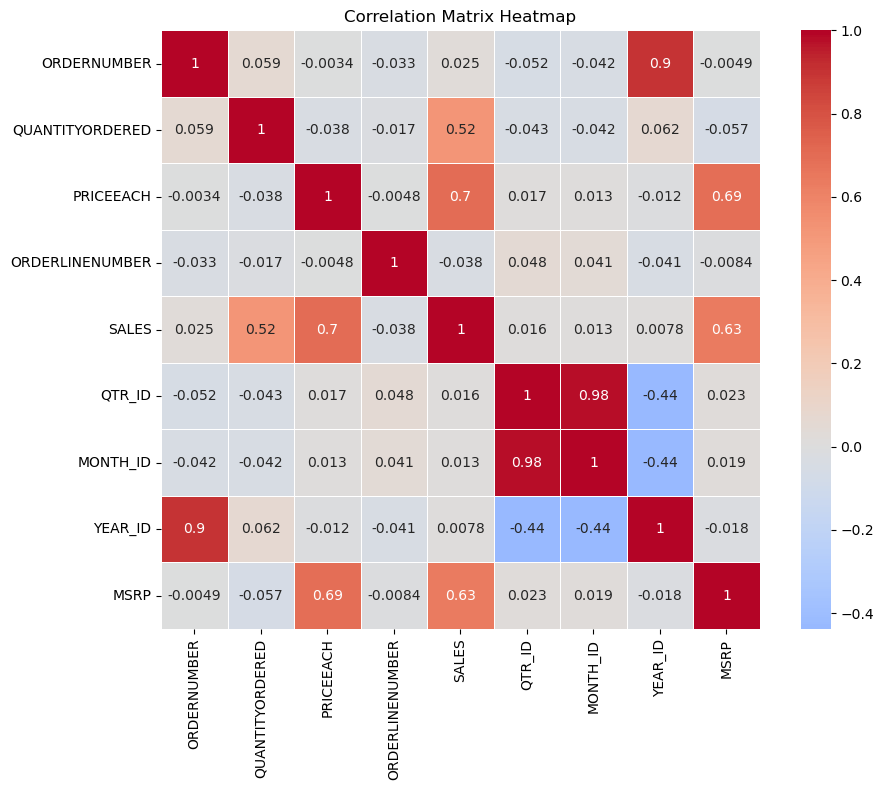

In [10]:
# 4. Correlation Analysis
print("\n=== CORRELATION ANALYSIS ===")

# Calculate correlation matrix for numerical columns
correlation_matrix = df_reduced[numerical_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [11]:
# Summary of key insights
print("\n" + "="*50)
print("KEY INSIGHTS SUMMARY")
print("="*50)

print("\n1. Dataset Overview:")
print(f"   - Original dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"   - After preprocessing: {df_reduced.shape[0]} rows, {df_reduced.shape[1]} columns")

print("\n2. Missing Data:")
print(f"   - ADDRESSLINE2: {missing_before['ADDRESSLINE2']} missing values")
print(f"   - STATE: {missing_before['STATE']} missing values")
print(f"   - All missing values handled successfully")

print("\n3. Outliers:")
print(f"   - {len(outliers)} outliers detected in SALES column")
print(f"   - Outliers removed for cleaner analysis")

print("\n4. Key Correlations:")
highest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
# Remove self-correlations
highest_corr = highest_corr[highest_corr < 1.0]
if len(highest_corr) > 0:
    idx = highest_corr.index[0]
    print(f"   - Strongest correlation: {idx[0]} vs {idx[1]} ({highest_corr.iloc[0]:.3f})")

print("\n5. Sales Distribution:")
print(f"   - Mean sales: ${df_reduced['SALES'].mean():.2f}")
print(f"   - Median sales: ${df_reduced['SALES'].median():.2f}")
print(f"   - Most common deal size: {df['DEALSIZE'].mode().iloc[0]}")




KEY INSIGHTS SUMMARY

1. Dataset Overview:
   - Original dataset: 2823 rows, 25 columns
   - After preprocessing: 1919 rows, 21 columns

2. Missing Data:
   - ADDRESSLINE2: 2521 missing values
   - STATE: 1486 missing values
   - All missing values handled successfully

3. Outliers:
   - 81 outliers detected in SALES column
   - Outliers removed for cleaner analysis

4. Key Correlations:
   - Strongest correlation: MONTH_ID vs QTR_ID (0.979)

5. Sales Distribution:
   - Mean sales: $3405.13
   - Median sales: $3164.80
   - Most common deal size: Medium
